In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels
import pickle

<h1 style="color:grey">Loading the Data</h>

In [2]:
with open('data/spx_train.pickle', 'rb') as f:
    df = pickle.load(f)
df['returns'] = df.market_value.pct_change()
df = df.dropna()
df.head()

,market_value,returns
date,,
1994-01-10,475.27,0.011428
1994-01-11,474.13,-0.002399
1994-01-12,474.17,0.000084
1994-01-13,472.47,-0.003585
1994-01-14,474.91,0.005164


# Moving Average Model
$r_t = c + \theta_1 \epsilon_{t-1} + \epsilon_t$

MA models use the ACF instead of the PACF!

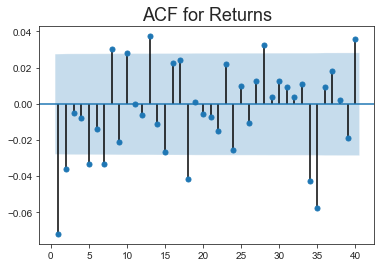

In [20]:
sm.graphics.tsa.plot_acf(df.returns, zero=False, lags=40)
plt.title('ACF for Returns', size=18)
plt.show()

In [23]:
# MA(1)
ret_ma1 = sm.tsa.ARMA(df.returns[1:], order=(0,1))
res_ret_ma1 = ret_ma1.fit()
res_ret_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 1)   Log Likelihood               15048.445
Method:                       css-mle   S.D. of innovations              0.012
Date:                Fri, 27 Mar 2020   AIC                         -30090.890
Time:                        11:09:54   BIC                         -30071.327
Sample:                    01-11-1994   HQIC                        -30084.034
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      1.970      0.049    1.58e-06       0.001
ma.L1.returns    -0.0781      0.015     -5.334      0.000      -0.107      -0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           12.8063           +0.0000j           12.8063            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
# MA(2)
ret_ma2 = sm.tsa.ARMA(df.returns[1:], order=(0,2))
res_ret_ma2 = ret_ma2.fit()
res_ret_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 2)   Log Likelihood               15052.104
Method:                       css-mle   S.D. of innovations              0.012
Date:                Fri, 27 Mar 2020   AIC                         -30096.208
Time:                        11:17:23   BIC                         -30070.124
Sample:                    01-11-1994   HQIC                        -30087.067
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      2.053      0.040    1.41e-05       0.001
ma.L1.returns    -0.0759      0.014     -5.380      0.000      -0.104      -0.048
ma.L2.returns    -0.0389      0.014     -2.706      0.007      -0.067      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.1892           +0.0000j            4.1892            0.0000
MA.2           -6.1414           +0.0000j            6.1414            0.5000
-----------------------------------------------------------------------------
"""

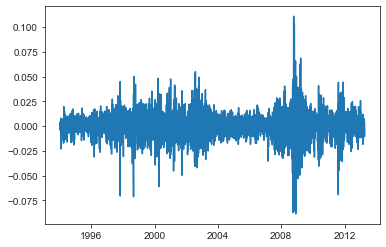

In [40]:
plt.plot(res_ret_ma2.resid) # White Noise

# MA Models on Normalized Values

In [43]:
df['norm_ret'] = df.returns/df.returns[0]*100

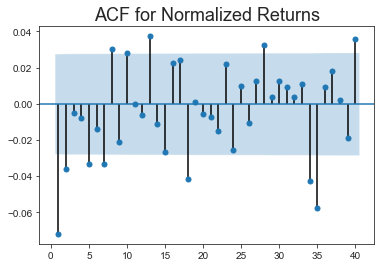

In [75]:
sm.graphics.tsa.plot_acf(df.norm_ret, zero=False, lags=40)
plt.title('ACF for Normalized Returns', size=18)
plt.show()

In [45]:
# MA(8)
ret_ma8 = sm.tsa.ARMA(df.norm_ret, order=(0,8))
res_ret_ma8 = ret_ma8.fit()
res_ret_ma8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -30501.297
Method:                       css-mle   S.D. of innovations            105.321
Date:                Fri, 27 Mar 2020   AIC                          61022.593
Time:                        11:27:18   BIC                          61087.805
Sample:                    01-10-1994   HQIC                         61045.444
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7256      1.214      2.246      0.025       0.347       5.104
ma.L1.norm_ret    -0.0754      0.014     -5.337      0.000      -0.103      -0.048
ma.L2.norm_ret    -0.0416      0.014     -2.933      0.003      -0.069      -0.014
ma.L3.norm_ret    -0.0055      0.014     -0.385      0.700      -0.033       0.022
ma.L4.norm_ret    -0.0114      0.014     -0.806      0.420      -0.039       0.016
ma.L5.norm_ret    -0.0359      0.014     -2.617      0.009      -0.063      -0.009
ma.L6.norm_ret    -0.0121      0.014     -0.847      0.397      -0.040       0.016
ma.L7.norm_ret    -0.0311      0.014     -2.157      0.031      -0.059      -0.003
ma.L8.norm_ret     0.0293      0.014      2.123      0.034       0.002       0.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3312           -0.6022j            1.4611           -0.4324
MA.2           -1.3312           +0.6022j            1.4611            0.4324
MA.3           -0.5162           -1.4570j            1.5457           -0.3042
MA.4           -0.5162           +1.4570j            1.5457            0.3042
MA.5            0.6927           -1.3374j            1.5062           -0.1739
MA.6            0.6927           +1.3374j            1.5062            0.1739
MA.7            1.6842           -0.3288j            1.7160           -0.0307
MA.8            1.6842           +0.3288j            1.7160            0.0307
-----------------------------------------------------------------------------
"""

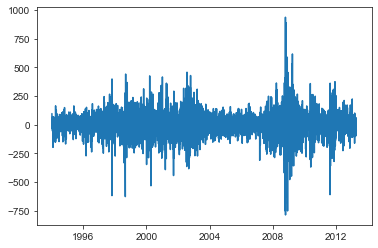

In [46]:
plt.plot(res_ret_ma8.resid)

# Combinding AR and MA Models: ARMA
... in the `order` argument `(p, q)` one can specify the number of lagged values (p) and the number of lagged errors to account for (q).  

$r_t = c + \varphi_1 r_{t-1} + \theta_1 \epsilon_{t-1} + \epsilon_t$

In [50]:
# ARMA(1,1)
arma_11 = sm.tsa.ARMA(df.returns, order=(1,1))
results_arma_11 = arma_11.fit()
results_arma_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               15057.352
Method:                       css-mle   S.D. of innovations              0.012
Date:                Fri, 27 Mar 2020   AIC                         -30106.703
Time:                        11:44:11   BIC                         -30080.618
Sample:                    01-10-1994   HQIC                        -30097.563
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      2.236      0.025    3.85e-05       0.001
ar.L1.returns     0.6106      0.100      6.105      0.000       0.415       0.807
ma.L1.returns    -0.6813      0.093     -7.363      0.000      -0.863      -0.500
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6378           +0.0000j            1.6378            0.0000
MA.1            1.4677           +0.0000j            1.4677            0.0000
-----------------------------------------------------------------------------
"""

(-17.0344571909813,
 8.280537020315404e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 -29896.04121570009)

In [71]:
# ARMA (3,3)
arma_33 = sm.tsa.ARMA(df.returns, order=(3,3))
results_arma_33 = arma_33.fit(start_ar_lags=8)
results_arma_33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               15058.247
Method:                       css-mle   S.D. of innovations              0.012
Date:                Fri, 27 Mar 2020   AIC                         -30100.494
Time:                        12:03:58   BIC                         -30048.325
Sample:                    01-10-1994   HQIC                        -30082.214
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      2.262      0.024    4.16e-05       0.001
ar.L1.returns     0.0119      0.546      0.022      0.983      -1.058       1.082
ar.L2.returns     0.6577      0.171      3.848      0.000       0.323       0.993
ar.L3.returns    -0.1158      0.305     -0.380      0.704      -0.714       0.482
ma.L1.returns    -0.0893      0.546     -0.164      0.870      -1.159       0.981
ma.L2.returns    -0.6874      0.148     -4.640      0.000      -0.978      -0.397
ma.L3.returns     0.1378      0.331      0.416      0.677      -0.511       0.786
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1334           +0.0000j            1.1334            0.5000
AR.2            1.4103           +0.0000j            1.4103            0.0000
AR.3            5.4006           +0.0000j            5.4006            0.0000
MA.1           -1.1422           +0.0000j            1.1422            0.5000
MA.2            1.3210           +0.0000j            1.3210            0.0000
MA.3            4.8104           +0.0000j            4.8104            0.0000
-----------------------------------------------------------------------------
"""

# ARIMA Model
- an ARIMA(p, d, q) model is suited to model non-stationary data, as it uses the difference between a value and the preceeding value (first order differencing), which helps induce stationarity.
- Second oder differencing: $y_t = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2})$ where d denotes the order of differencing

In [84]:
from statsmodels.tsa.arima_model import ARIMA

In [85]:
arima_111 = ARIMA(df.market_value, order=(1,1,1))
res_arima_111 = arima_111.fit()
res_arima_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -20067.778
Method:                       css-mle   S.D. of innovations             13.190
Date:                Fri, 27 Mar 2020   AIC                          40143.556
Time:                        13:19:16   BIC                          40169.640
Sample:                    01-11-1994   HQIC                         40152.696
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2152      0.154      1.399      0.162      -0.086       0.517
ar.L1.D.market_value     0.6064      0.099      6.141      0.000       0.413       0.800
ma.L1.D.market_value    -0.6749      0.092     -7.363      0.000      -0.855      -0.495
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6490           +0.0000j            1.6490            0.0000
MA.1            1.4817           +0.0000j            1.4817            0.0000
-----------------------------------------------------------------------------
"""

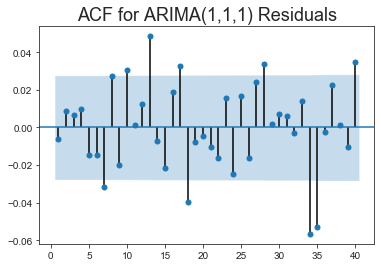

In [86]:
sm.graphics.tsa.plot_acf(res_arima_111.resid, zero=False, lags=40)
plt.title('ACF for ARIMA(1,1,1) Residuals', size=18)
plt.show()

In [100]:
ARIMA(df.market_value, order=(1,1,7)).fit(start_ar_lags=8).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 7)   Log Likelihood              -20060.092
Method:                       css-mle   S.D. of innovations             13.169
Date:                Fri, 27 Mar 2020   AIC                          40140.183
Time:                        13:27:34   BIC                          40205.393
Sample:                    01-11-1994   HQIC                         40163.034
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2152      0.150      1.433      0.152      -0.079       0.509
ar.L1.D.market_value    -0.6697      0.108     -6.226      0.000      -0.881      -0.459
ma.L1.D.market_value     0.5971      0.108      5.530      0.000       0.385       0.809
ma.L2.D.market_value    -0.0828      0.018     -4.587      0.000      -0.118      -0.047
ma.L3.D.market_value    -0.0399      0.017     -2.352      0.019      -0.073      -0.007
ma.L4.D.market_value    -0.0157      0.016     -0.957      0.338      -0.048       0.016
ma.L5.D.market_value    -0.0281      0.016     -1.727      0.084      -0.060       0.004
ma.L6.D.market_value    -0.0327      0.016     -1.984      0.047      -0.065      -0.000
ma.L7.D.market_value    -0.0494      0.014     -3.557      0.000      -0.077      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4932           +0.0000j            1.4932            0.5000
MA.1           -1.2949           -0.3938j            1.3534           -0.4530
MA.2           -1.2949           +0.3938j            1.3534            0.4530
MA.3            1.5101           -0.0000j            1.5101           -0.0000
MA.4            0.8716           -1.3946j            1.6446           -0.1611
MA.5            0.8716           +1.3946j            1.6446            0.1611
MA.6           -0.6627           -1.5051j            1.6446           -0.3160
MA.7           -0.6627           +1.5051j            1.6446            0.3160
-----------------------------------------------------------------------------
"""